In [2]:
from polytope.api import Client

In [3]:
polytope_address="polytope.lumi.apps.dte.destination-earth.eu"
client = Client(address=polytope_address)

In [4]:
# Data request
# 
# As for the global Extremes-DT output data is requested using the MARS language. The big difference here is that we have a new domain for every run which is done through the `georef` key, see below.

import earthkit.data

# Example from github repo
# request = {
#     'class': 'd1',
#     'dataset': 'on-demand-extremes-dt',
#     'expver': '0099',
#     'stream': 'oper',
#     'date': '20250616',
#     'time': 0,
#     'type': 'fc',
#     'levtype': 'sfc',
#     'georef': 'u4usq2',
#     'step': 12,
#     'param': 167
# }

# NWP data from Ulf
request = {
    "class": "d1",
    "dataset": "on-demand-extremes-dt",
    "expver": "aab0",
    "stream": "oper",
    "date": "20240811",
    "time": "0000",
    "type": "fc",
    "levtype": "sfc",
    "georef": "u1557h",
    "param": "167",
    "step": "18",
}

data = earthkit.data.from_source("polytope", "destination-earth", request, address=polytope_address, stream=False)

2025-09-23 13:27:25 - INFO - Key read from /home/jovyan/.polytopeapirc
2025-09-23 13:27:25 - INFO - Sending request...
{'request': 'class: d1\n'
            'dataset: on-demand-extremes-dt\n'
            "date: '20240811'\n"
            'expver: aab0\n'
            'georef: u1557h\n'
            'levtype: sfc\n'
            "param: '167'\n"
            "step: '18'\n"
            'stream: oper\n'
            "time: '0000'\n"
            'type: fc\n',
 'verb': 'retrieve'}
2025-09-23 13:27:25 - INFO - Polytope user key found in session cache for user jovyan
2025-09-23 13:27:27 - INFO - Request accepted. Please poll ./1e07709e-c11e-432f-8025-6711e791c4dc for status
2025-09-23 13:27:27 - INFO - Polytope user key found in session cache for user jovyan
2025-09-23 13:27:27 - INFO - Checking request status (./1e07709e-c11e-432f-8025-6711e791c4dc)...
2025-09-23 13:27:27 - INFO - The current status of the request is 'queued'
2025-09-23 13:27:29 - INFO - The current status of the request is 'proce

In [5]:
# Data inspection
# 
# We can list the data using the `ls` method. Here we see e.g. that we run the model in the `lambert_lam` projection.

data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,2t,heightAboveGround,2,20240811,0,18,fc,None,lambert_lam


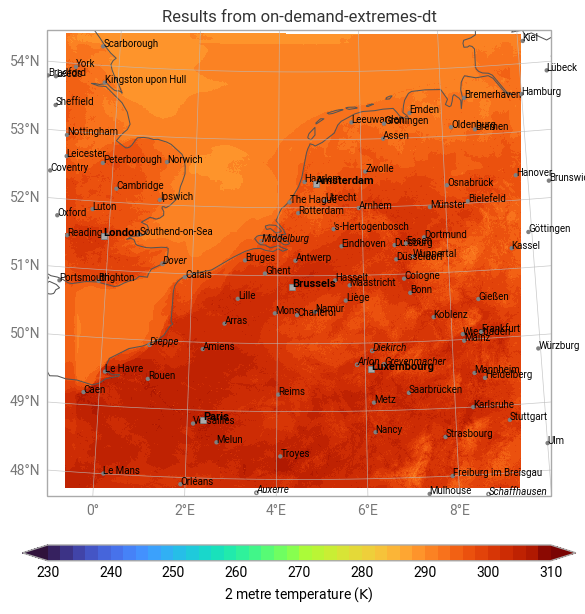

<Figure size 700x600 with 0 Axes>

In [6]:
# Plotting
# 
# Finally we create plot of the data retrieved using earthkit-plots.

import earthkit.plots
import cartopy.crs
#crs=cartopy.crs.LambertCylindrical()
chart = earthkit.plots.Map(domain=[-1.0,10,47.75,54.5])
chart.plot(data)
chart.cities(density="high")
chart.title(f"Results from on-demand-extremes-dt")
chart.coastlines()
chart.gridlines()
chart.legend()
# chart.labels(data=None, label="LDN", x=[0.0], y=[51.5])
# chart.labels(data=None, label="ANT", x=[4.4], y=[51.21])
chart.show()
chart.save("on-demand-extremes-dt.png")